In [4]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud

import isodate
import ast
import re
from unidecode import unidecode

import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Import necessary libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns


# Import necessary libraries for data selection
from sklearn.feature_selection import chi2

# Import library for data splitting
from sklearn.model_selection import train_test_split

# Import necessary libraries for data modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor, Pool

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap

In [6]:
df = pd.read_csv('youtube_trending_data.csv', parse_dates=['trending_date'])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trending_date         3649 non-null   datetime64[ns]
 1   trending_country      3649 non-null   object        
 2   rank                  3649 non-null   int64         
 3   video_id              3649 non-null   object        
 4   video_title           3649 non-null   object        
 5   video_published_at    3649 non-null   object        
 6   video_description     3605 non-null   object        
 7   channel_id            3649 non-null   object        
 8   channel_title         3649 non-null   object        
 9   tags                  3649 non-null   object        
 10  category_id           3649 non-null   int64         
 11  default_language      3598 non-null   object        
 12  duration              3649 non-null   object        
 13  dimension         

,trending_date,rank,category_id,video_view_count,video_like_count,video_comment_count,channel_view_count,subscriber_count,video_count
count,3649,3649.000000,3649.000000,3.638000e+03,3.634000e+03,3638.000000,3.638000e+03,3.638000e+03,3638.000000
mean,2025-10-13 15:42:50.335379200,25.493286,15.980817,1.081763e+06,4.128917e+04,2894.493403,6.115982e+09,9.211910e+06,6249.940352
min,2025-09-20 21:10:10.862697,1.000000,1.000000,1.108000e+03,1.800000e+01,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,2025-09-30 23:51:44.974759936,13.000000,10.000000,1.320810e+05,3.995000e+03,230.000000,2.179083e+08,4.762500e+05,187.500000
50%,2025-10-13 21:49:33.875388928,25.000000,20.000000,3.145745e+05,1.138300e+04,798.000000,1.147758e+09,2.630000e+06,823.500000
75%,2025-10-25 16:55:15.072847872,38.000000,20.000000,8.543250e+05,3.252125e+04,2493.000000,3.435285e+09,7.570000e+06,2410.500000
max,2025-11-05 10:43:40.420517,50.000000,29.000000,3.930529e+07,1.847195e+06,133541.000000,3.178038e+11,3.060000e+08,292880.000000
std,NaN,14.429123,6.915425,2.726944e+06,1.066336e+05,7260.387882,2.793248e+10,2.846057e+07,27917.049867


In [119]:
df.describe()

,trending_date,rank,category_id,video_view_count,video_like_count,video_comment_count,channel_view_count,subscriber_count,video_count
count,2450,2450.000000,2450.000000,2.442000e+03,2.439000e+03,2442.000000,2.442000e+03,2.442000e+03,2442.000000
mean,2025-10-05 19:19:10.313145856,25.500000,15.810612,1.154208e+06,4.404028e+04,2947.169533,6.218901e+09,9.396924e+06,6310.869779
min,2025-09-20 21:10:10.862697,1.000000,1.000000,2.131000e+03,6.700000e+01,0.000000,8.000000e+00,6.000000e+00,0.000000
25%,2025-09-27 23:48:42.777444096,13.000000,10.000000,1.255745e+05,4.001500e+03,245.000000,2.313812e+08,4.800000e+05,196.000000
50%,2025-10-05 12:16:06.782583040,25.500000,20.000000,2.952865e+05,1.177200e+04,826.000000,1.174404e+09,2.730000e+06,854.000000
75%,2025-10-13 21:49:33.875388928,38.000000,20.000000,8.005828e+05,3.279200e+04,2624.750000,3.704160e+09,7.660000e+06,2592.250000
max,2025-10-19 12:37:19.028277,50.000000,29.000000,3.930529e+07,1.847195e+06,133541.000000,3.160199e+11,3.050000e+08,278785.000000
std,NaN,14.433816,6.979235,3.075713e+06,1.174968e+05,7695.390800,2.697803e+10,2.781645e+07,28423.761423


In [120]:
df.columns

Index(['trending_date', 'trending_country', 'rank', 'video_id', 'video_title',
       'video_published_at', 'video_description', 'channel_id',
       'channel_title', 'tags', 'category_id', 'default_language', 'duration',
       'dimension', 'definition', 'licensed_content', 'video_view_count',
       'video_like_count', 'video_comment_count', 'topic_categories',
       'made_for_kids', 'channel_published_at', 'channel_description',
       'channel_country', 'channel_view_count', 'subscriber_count',
       'video_count'],
      dtype='object')

In [121]:
df['made_for_kids'].value_counts()

made_for_kids
False    2000
Name: count, dtype: int64

In [122]:
def data_cleaning(df):
    # Remove duplicates
    hashable_cols = [col for col in df.columns if col not in ['tags', 'topic_categories']]
    df_clean = df.drop_duplicates(subset=hashable_cols)

    # Handle missing values
    key_columns = [
                    'video_id',
                    'video_title', 
                    'video_view_count', 
                    'video_like_count', 
                    'video_comment_count',
                    'video_count', 
                    'subscriber_count', 
                    'channel_view_count'
                ]
    df_clean = df_clean.dropna(subset=key_columns)

    # Remove entries with zero video_count, video_view_count, or channel_view_count
    df_clean = df_clean[(df_clean['video_count'] != 0) & (df_clean['video_view_count'] != 0) & (df_clean['channel_view_count'] != 0)]

    # Filter for English language videos
    df_clean = df_clean[df_clean['default_language'].str.startswith('en', na=False)]

    # Map category_id to category_title
    category_map = {
                    '1': 'Film & Animation',
                    '2': 'Autos & Vehicles',
                    '10': 'Music',
                    '15': 'Pets & Animals',
                    '17': 'Sports',
                    '18': 'Short Movies',
                    '19': 'Travel & Events',
                    '20': 'Gaming',
                    '21': 'Videoblogging',
                    '22': 'People & Blogs',
                    '23': 'Comedy',
                    '24': 'Entertainment',
                    '25': 'News & Politics',
                    '26': 'Howto & Style',
                    '27': 'Education',
                    '28': 'Science & Technology',
                    '29': 'Nonprofits & Activism',
                    '30': 'Movies',
                    '31': 'Anime/Animation',
                    '32': 'Action/Adventure',
                    '33': 'Classics',
                    '34': 'Comedy',
                    '35': 'Documentary',
                    '36': 'Drama',
                    '37': 'Family',
                    '38': 'Foreign',
                    '39': 'Horror',
                    '40': 'Sci-Fi/Fantasy',
                    '41': 'Thriller',
                    '42': 'Shorts',
                    '43': 'Shows',
                    '44': 'Trailers'
                    }   

    # Process duration and category   
    df_clean['category_title'] = df_clean['category_id'].apply(lambda x: category_map[str(x)])
    df_clean['duration_min'] = df_clean['duration'].apply(
        lambda x: isodate.parse_duration(x).total_seconds()/60)
    df_clean['is_high_definition'] = df_clean['definition'].apply(lambda x: 1 if x == 'hd' else 0)

    # Convert date columns to datetime
    df_clean['video_published_at'] = pd.to_datetime(df_clean['video_published_at'])
    df_clean['channel_published_at'] = df_clean['channel_published_at'].apply(lambda x: re.sub(r'\.\d+Z', 'Z', str(x)))
    df_clean['channel_published_at'] = pd.to_datetime(df_clean['channel_published_at']) 
    

    return df_clean

In [123]:
def normalize_text(text):
    if pd.isna(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #  Remove Web links
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def additional_normalize_text(text):
    if pd.isna(text):
        return ''
    
    # Convert accented characters to their ASCII equivalents
    text = unidecode(text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def normalize_text_columns(df, function=normalize_text):
    text_columns = ['video_title', 'video_description', 'channel_title', 'channel_description']
    for col in text_columns:
        df[col] = df[col].apply(function)
    return df

In [124]:
def sentiment_enginering(df):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_columns = ['video_title', 'video_description']
    for col in sentiment_columns:
        df[f'{col}_sentiment'] = df[col].apply(lambda x: analyzer.polarity_scores(x)["compound"])
        # df[f'has_emoji_in_{col}'] = df[col].apply(lambda x: 1 if any(char in emoji.EMOJI_DATA for char in x) else 0)
        df[f'count_of_emoji_in_{col}'] = df[col].apply(lambda x: sum(1 for char in x if char in emoji.EMOJI_DATA)) 
    return df

In [125]:
def model_feature_engineering(df):

    df['publishing_day'] = df['video_published_at'].apply(lambda x: pd.to_datetime(x).day_name())
    df['publishing_hour'] = df['video_published_at'].apply(lambda x: pd.to_datetime(x).hour)
    
    df['video_age_days'] = (pd.to_datetime(df['trending_date'], utc=True) - pd.to_datetime(df['video_published_at'])).dt.total_seconds() / (24 * 3600)  
    df['channel_age_days'] = (pd.to_datetime(df['trending_date'], utc=True) - pd.to_datetime(df['channel_published_at'])).dt.total_seconds() / (24 * 3600)  

    # df['has_tags'] = df['tags'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '[]' else 1)
    df['counts_of_tags'] = df['tags'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))
    # df['has_topic_categories'] = df['topic_categories'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else 1)
    # df['counts_of_topic_categories'] = df['topic_categories'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))
    # df['has_video_description'] = df['video_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else 1)
    # df['has_channel_description'] = df['channel_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else 1)    
    df['word_count_in_title'] = df['video_title'].apply(lambda x: len(x.split()))
    df['word_count_in_description'] = df['video_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else len(x.split()))
    df['word_count_in_channel_title'] = df['channel_title'].apply(lambda x: len(x.split())) 
    df['word_count_in_channel_description'] = df['channel_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else len(x.split()))
    # df['character_count_in_title'] = df['video_title'].apply(lambda x: len(x))
    # df['character_count_in_description'] = df['video_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else len(x))
    

    # df['title_sentiment_blob'] = df['video_title'].apply(lambda x: TextBlob(x).sentiment.polarity)
    # df['description_sentiment_blob'] = df['video_description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else TextBlob(x).sentiment.polarity)

    return df


In [126]:
df = data_cleaning(df)
df = normalize_text_columns(df, function=normalize_text)
df = sentiment_enginering(df)
df = normalize_text_columns(df, function=additional_normalize_text)
dfoo = df.copy()
df = model_feature_engineering(df)
dfo = df.copy()
df.head()


,trending_date,trending_country,rank,video_id,video_title,video_published_at,video_description,channel_id,channel_title,tags,...,count_of_emoji_in_video_description,publishing_day,publishing_hour,video_age_days,channel_age_days,counts_of_tags,word_count_in_title,word_count_in_description,word_count_in_channel_title,word_count_in_channel_description
0,2025-09-20 21:10:10.862697,US,1,E_0y8bmIATM,cardi b safe feat kehlani official music video,2025-09-19 04:00:07+00:00,cardi b safe feat kehlani my new album am i th...,UCxMAbVFmxKUVGAll0WVGpFw,cardi b,"['Cardi B', 'Cardi', 'Atlantic Records', 'rap'...",...,0,Friday,4,1.715322,3215.268100,19,8,358,2,155
1,2025-09-20 21:10:10.862697,US,2,stLcNWpT6mU,avengers doomsday marvel finally did it,2025-09-19 22:24:37+00:00,avengers doomsday teaser marvel house of m eli...,UCDiFRMQWpcp8_KD4vwIVicw,emergency awesome,[],...,0,Friday,22,0.948309,4726.500728,0,6,447,2,145
2,2025-09-20 21:10:10.862697,US,3,1qgPgvaK5oo,new brainrots mexico event admin abuse,2025-09-20 20:10:24+00:00,new hoodie plushie play waterpark simulator no...,UCsPMNatXCwqyUuJilBT73jg,caylusblox,"['caylusblox', 'caylus roblox', 'caylus', 'rob...",...,9,Saturday,20,0.041515,414.575392,20,6,42,1,10
3,2025-09-20 21:10:10.862697,US,4,f1poeZFKBRo,g herbo reason,2025-09-19 23:00:52+00:00,music video by g herbo performing reasonc 2025...,UCgJG-YH8b_I4nc3oiHssdVA,gherbovevo,"['Herbo', 'Herbo/UMG', 'Hip Hop']",...,1,Friday,23,0.923135,3638.135971,3,3,24,1,0
4,2025-09-20 21:10:10.862697,US,5,zdu0YzzJ10o,idli kadai official trailer dhanush nithya men...,2025-09-20 13:28:07+00:00,for more latest songs videos subscribe present...,UCzee67JnEcuvjErRyWP3GpQ,saregama tamil,"['Idli Kadai', 'Idli Kadai trailer', 'Idli Kad...",...,1,Saturday,13,0.320878,4720.611873,18,13,165,2,61


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2449
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   trending_date                        2126 non-null   datetime64[ns]     
 1   trending_country                     2126 non-null   object             
 2   rank                                 2126 non-null   int64              
 3   video_id                             2126 non-null   object             
 4   video_title                          2126 non-null   object             
 5   video_published_at                   2126 non-null   datetime64[ns, UTC]
 6   video_description                    2126 non-null   object             
 7   channel_id                           2126 non-null   object             
 8   channel_title                        2126 non-null   object             
 9   tags                               

In [128]:
def data_encoding(df):
    # One-hot encode categorical variables
    one_hot_columns = ['category_title', 'publishing_day', 'publishing_hour']
    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=False)

    return df

In [129]:
df = data_encoding(df)
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2449
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   trending_date                         2126 non-null   datetime64[ns]     
 1   trending_country                      2126 non-null   object             
 2   rank                                  2126 non-null   int64              
 3   video_id                              2126 non-null   object             
 4   video_title                           2126 non-null   object             
 5   video_published_at                    2126 non-null   datetime64[ns, UTC]
 6   video_description                     2126 non-null   object             
 7   channel_id                            2126 non-null   object             
 8   channel_title                         2126 non-null   object             
 9   tags                    

In [130]:
df.head()

,trending_date,trending_country,rank,video_id,video_title,video_published_at,video_description,channel_id,channel_title,tags,...,publishing_hour_14,publishing_hour_15,publishing_hour_16,publishing_hour_17,publishing_hour_18,publishing_hour_19,publishing_hour_20,publishing_hour_21,publishing_hour_22,publishing_hour_23
0,2025-09-20 21:10:10.862697,US,1,E_0y8bmIATM,cardi b safe feat kehlani official music video,2025-09-19 04:00:07+00:00,cardi b safe feat kehlani my new album am i th...,UCxMAbVFmxKUVGAll0WVGpFw,cardi b,"['Cardi B', 'Cardi', 'Atlantic Records', 'rap'...",...,0,0,0,0,0,0,0,0,0,0
1,2025-09-20 21:10:10.862697,US,2,stLcNWpT6mU,avengers doomsday marvel finally did it,2025-09-19 22:24:37+00:00,avengers doomsday teaser marvel house of m eli...,UCDiFRMQWpcp8_KD4vwIVicw,emergency awesome,[],...,0,0,0,0,0,0,0,0,1,0
2,2025-09-20 21:10:10.862697,US,3,1qgPgvaK5oo,new brainrots mexico event admin abuse,2025-09-20 20:10:24+00:00,new hoodie plushie play waterpark simulator no...,UCsPMNatXCwqyUuJilBT73jg,caylusblox,"['caylusblox', 'caylus roblox', 'caylus', 'rob...",...,0,0,0,0,0,0,1,0,0,0
3,2025-09-20 21:10:10.862697,US,4,f1poeZFKBRo,g herbo reason,2025-09-19 23:00:52+00:00,music video by g herbo performing reasonc 2025...,UCgJG-YH8b_I4nc3oiHssdVA,gherbovevo,"['Herbo', 'Herbo/UMG', 'Hip Hop']",...,0,0,0,0,0,0,0,0,0,1
4,2025-09-20 21:10:10.862697,US,5,zdu0YzzJ10o,idli kadai official trailer dhanush nithya men...,2025-09-20 13:28:07+00:00,for more latest songs videos subscribe present...,UCzee67JnEcuvjErRyWP3GpQ,saregama tamil,"['Idli Kadai', 'Idli Kadai trailer', 'Idli Kad...",...,0,0,0,0,0,0,0,0,0,0


EDA

<Axes: >

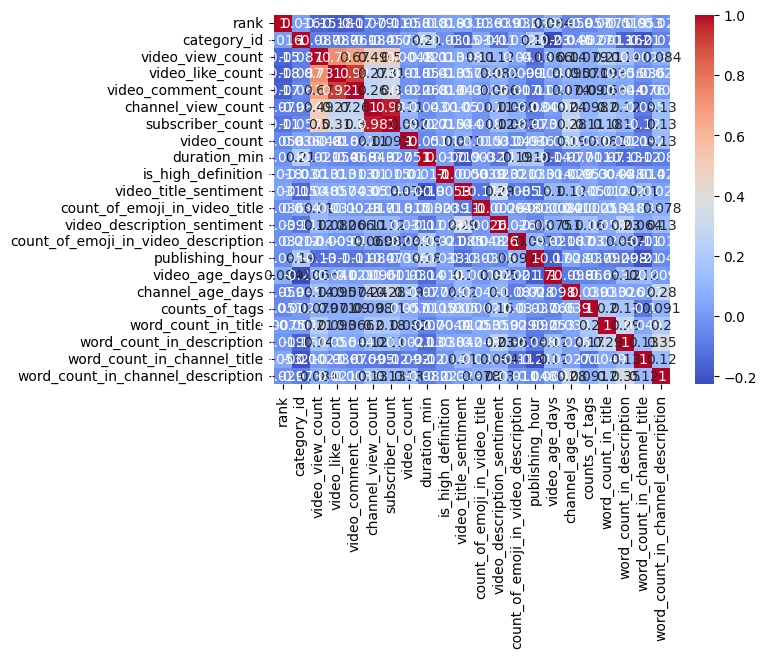

In [131]:
# heatmap for correlation
numeric_cols = dfo.select_dtypes(include='number').columns.tolist()
categorical_cols = dfo.select_dtypes(include=['object', 'category']).columns.tolist()

sns.heatmap(dfo[numeric_cols].corr(), annot=True, cmap='coolwarm')



In [132]:
df.head

<bound method NDFrame.head of                   trending_date trending_country  rank     video_id  \
0    2025-09-20 21:10:10.862697               US     1  E_0y8bmIATM   
1    2025-09-20 21:10:10.862697               US     2  stLcNWpT6mU   
2    2025-09-20 21:10:10.862697               US     3  1qgPgvaK5oo   
3    2025-09-20 21:10:10.862697               US     4  f1poeZFKBRo   
4    2025-09-20 21:10:10.862697               US     5  zdu0YzzJ10o   
...                         ...              ...   ...          ...   
2444 2025-10-19 12:37:19.028277               CA    45  TMN4bbhxl1c   
2445 2025-10-19 12:37:19.028277               CA    46  RGIqJsispAs   
2446 2025-10-19 12:37:19.028277               CA    47  CF3AxDy_FhU   
2447 2025-10-19 12:37:19.028277               CA    48  wNctQgcVW_Q   
2449 2025-10-19 12:37:19.028277               CA    50  x2znKp0SDi4   

                                            video_title  \
0        cardi b safe feat kehlani official music video   

<Axes: >

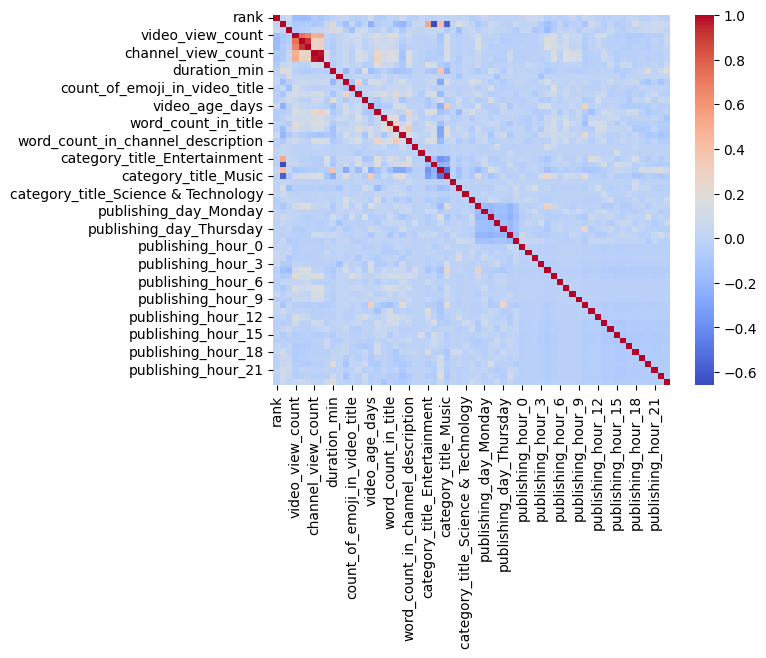

In [133]:
# heatmap for correlation
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')



In [ ]:
numeric_cols

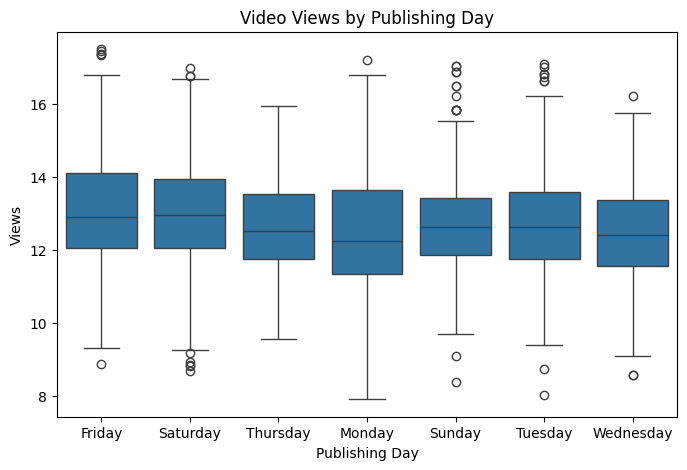

In [135]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_day', y=np.log(dfo['video_view_count']), data=dfo)
plt.title("Video Views by Publishing Day")
plt.ylabel("Views")
plt.xlabel("Publishing Day")
plt.show()

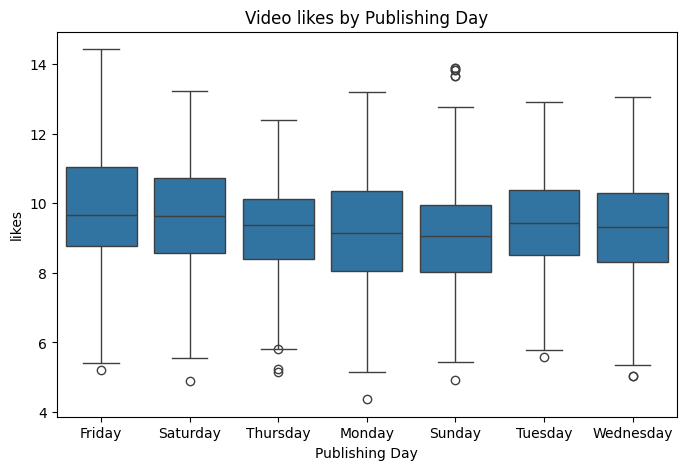

In [136]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_day', y=np.log(dfo['video_like_count']), data=dfo)
plt.title("Video likes by Publishing Day")
plt.ylabel("likes")
plt.xlabel("Publishing Day")
plt.show()

/Users/meilan/neuMSDAE/myenv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


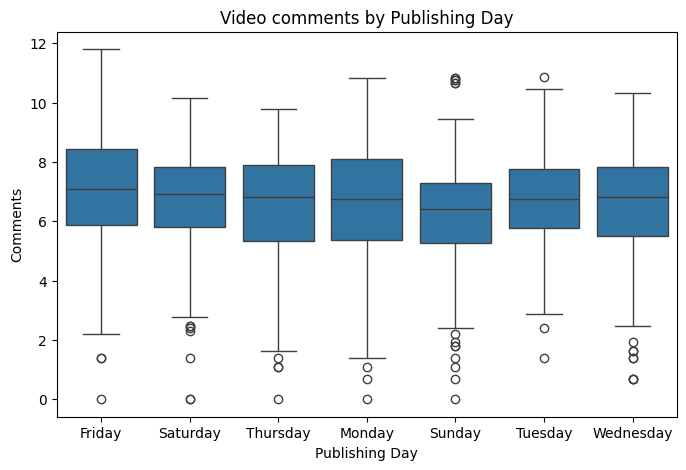

In [137]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_day', y=np.log(dfo['video_comment_count']), data=dfo)
plt.title("Video comments by Publishing Day")
plt.ylabel("Comments")
plt.xlabel("Publishing Day")
plt.show()

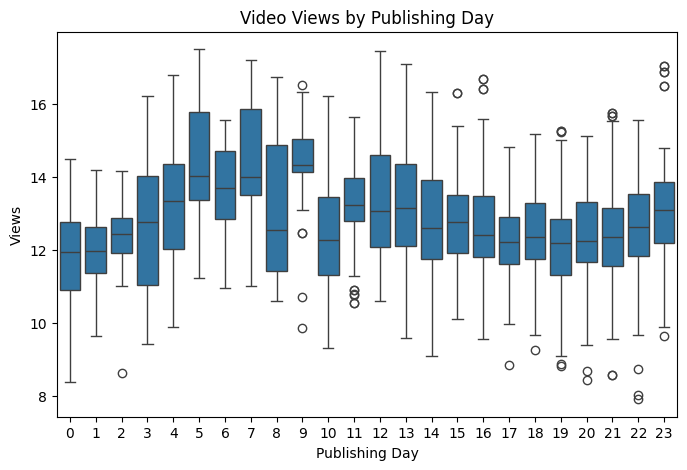

In [138]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_hour', y=np.log(dfo['video_view_count']), data=dfo)
plt.title("Video Views by Publishing Day")
plt.ylabel("Views")
plt.xlabel("Publishing Day")
plt.show()

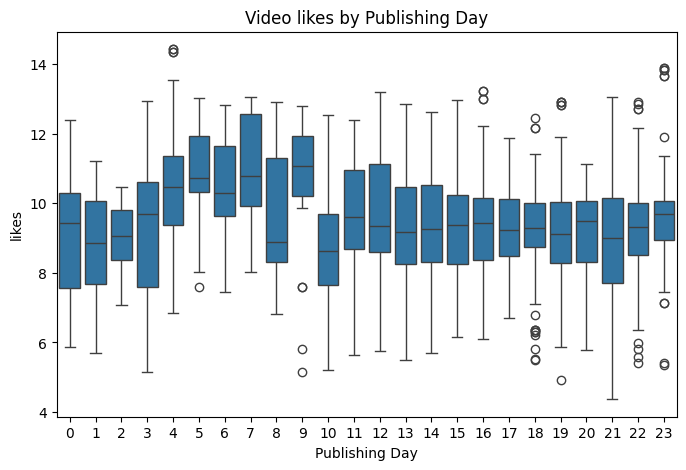

In [139]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_hour', y=np.log(dfo['video_like_count']), data=dfo)
plt.title("Video likes by Publishing Day")
plt.ylabel("likes")
plt.xlabel("Publishing Day")
plt.show()

/Users/meilan/neuMSDAE/myenv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


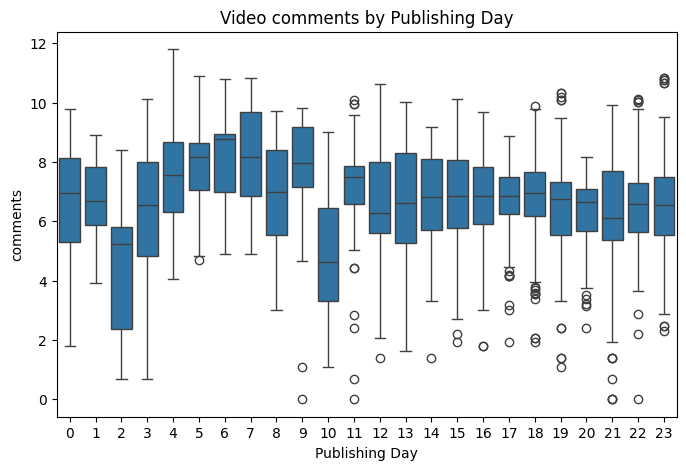

In [140]:
plt.figure(figsize=(8,5))
sns.boxplot(x='publishing_hour', y=np.log(dfo['video_comment_count']), data=dfo)
plt.title("Video comments by Publishing Day")
plt.ylabel("comments")
plt.xlabel("Publishing Day")
plt.show()

In [ ]:
sns.scatterplot(x='video_view_count', y='video_like_count', data=dfo)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Video View Count (log scale)')
plt.ylabel('Video Like Count (log scale)')
plt.title('Scatter Plot of Video View Count vs. Video Like Count')
plt.show()


In [ ]:
sns.scatterplot(x='video_view_count', y='video_comment_count', data=dfo)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Video View Count (log scale)')
plt.ylabel('Video Comment Count (log scale)')
plt.title('Scatter Plot of Video View Count vs. Video Comment Count')
plt.show()               

In [ ]:
sns.scatterplot(x='video_like_count', y='video_comment_count', data=dfo)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Video Like Count (log scale)')
plt.ylabel('Video Comment Count (log scale)')
plt.title('Scatter Plot of Video Like Count vs. Video Comment Count')
plt.show()




In [ ]:
dfo.columns

In [ ]:
dfo.columns

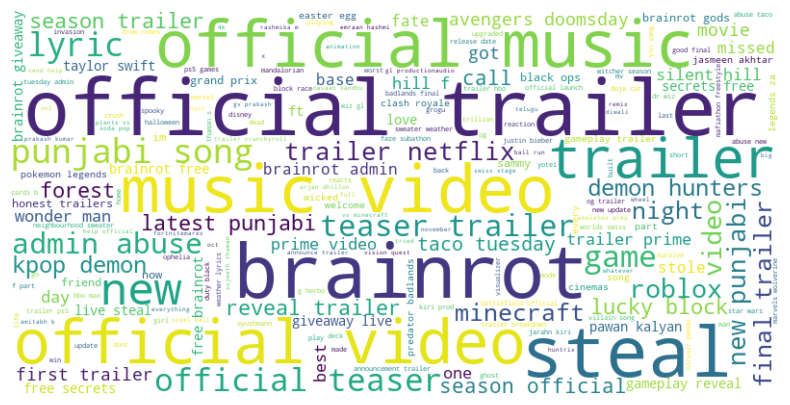

In [ ]:
text = ' '.join(dfo['video_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfo['category_title'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Video Categories')

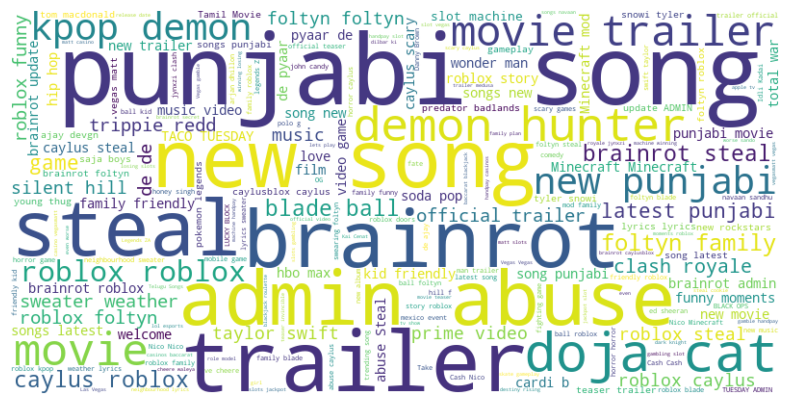

In [ ]:
all_tags = ' '.join(dfo['tags'].dropna().apply(lambda x: ' '.join(ast.literal_eval(x))))
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate(all_tags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfo_game = dfo[dfo['category_title'] == 'Gaming']
all_tags_game = ' '.join(dfo_game['tags'].dropna().apply(lambda x: ' '.join(ast.literal_eval(x))))
wordcloud_tags_game = WordCloud(width=800, height=400, background_color='white').generate(all_tags_game)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags_game, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
dfo_entertainment = dfo[dfo['category_title'] == 'Entertainment']
all_tags_entertainment = ' '.join(dfo_entertainment['tags'].dropna().apply(lambda x: ' '.join(ast.literal_eval(x))))
wordcloud_tags_entertainment = WordCloud(width=800, height=400, background_color='white').generate(all_tags_entertainment)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags_entertainment, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
title_gaming_text = ' '.join(dfo_game['video_title'].dropna())
wordcloud_title_game = WordCloud(width=800, height=400, background_color='white').generate(title_gaming_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title_game, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
title_entertainment_text = ' '.join(dfo_entertainment['video_title'].dropna())
wordcloud_title_entertainment = WordCloud(width=800, height=400, background_color='white').generate(title_entertainment_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title_entertainment, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfo[dfo['category_title'] == 'Education']

In [ ]:
dfo['category_title'].value_counts()

In [ ]:
df.columns

In [141]:
df_model = df[[
 
 'licensed_content',
 'video_view_count',
 'video_like_count',
 'video_comment_count',
 'channel_view_count',
 'subscriber_count',
 'video_count',
 'duration_min',
 'is_high_definition',

 'counts_of_tags',
 'video_title_sentiment',
 'count_of_emoji_in_video_title',
 'video_description_sentiment',
 'count_of_emoji_in_video_description',
 'video_age_days',
 'channel_age_days',

 
 'word_count_in_title',
 'word_count_in_description',
 'word_count_in_channel_title',
 'word_count_in_channel_description',
 'category_title_Comedy',
 'category_title_Education', 'category_title_Entertainment',
       'category_title_Film & Animation', 'category_title_Gaming',
       'category_title_Music', 'category_title_Nonprofits & Activism',
       'category_title_People & Blogs', 'category_title_Science & Technology',
       'category_title_Sports', 
       'publishing_day_Friday',

      'publishing_day_Monday',
      'publishing_day_Saturday',
      'publishing_day_Sunday',
      'publishing_day_Thursday',
      'publishing_day_Tuesday',
      'publishing_day_Wednesday',
      'publishing_hour_0',
      'publishing_hour_1',
      'publishing_hour_2',
      'publishing_hour_3',
      'publishing_hour_4',
      'publishing_hour_5',
      'publishing_hour_6',
      'publishing_hour_7',
      'publishing_hour_8',
      'publishing_hour_9',
      'publishing_hour_10',
      'publishing_hour_11',
      'publishing_hour_12',
      'publishing_hour_13',
      'publishing_hour_14',
      'publishing_hour_15',
      'publishing_hour_16',
      'publishing_hour_17',
      'publishing_hour_18',
      'publishing_hour_19',
      'publishing_hour_20',
      'publishing_hour_21',
      'publishing_hour_22',
      'publishing_hour_23',
 ]]

len(df_model.columns)

61

In [142]:
output_cols =[
 'video_view_count',
 'video_like_count',
 'video_comment_count',
 'channel_view_count',
 'subscriber_count']

In [143]:
df_output = df[output_cols]
df_output['engaging_count']= df['video_like_count'] + df['video_comment_count']
df_output.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_view_count     2126 non-null   float64
 1   video_like_count     2126 non-null   float64
 2   video_comment_count  2126 non-null   float64
 3   channel_view_count   2126 non-null   float64
 4   subscriber_count     2126 non-null   float64
 5   engaging_count       2126 non-null   float64
dtypes: float64(6)
memory usage: 116.3 KB


/var/folders/kg/0rnyb9h57zjgz1rz383bzj380000gn/T/ipykernel_26375/2695098275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['engaging_count']= df['video_like_count'] + df['video_comment_count']


In [144]:
df_model = df_model.drop(columns=output_cols)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2449
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   licensed_content                      2126 non-null   int64  
 1   video_count                           2126 non-null   float64
 2   duration_min                          2126 non-null   float64
 3   is_high_definition                    2126 non-null   int64  
 4   counts_of_tags                        2126 non-null   int64  
 5   video_title_sentiment                 2126 non-null   float64
 6   count_of_emoji_in_video_title         2126 non-null   int64  
 7   video_description_sentiment           2126 non-null   float64
 8   count_of_emoji_in_video_description   2126 non-null   int64  
 9   video_age_days                        2126 non-null   float64
 10  channel_age_days                      2126 non-null   float64
 11  word_count_in_title   

In [ ]:

y = df_output['rank']
X = df_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
# Define a functio to train the model and display metric evaluations
def train_model(model, X_train=X_train, y_train=y_train):
    # fit the model
    model.fit(X_train, y_train)
    # predict y
    y_predict = model.predict(X_test)

    r2 = r2_score(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse) 

    print(f'R^2: {r2}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
   

In [ ]:
# Build a random forest model
random_forest_model_rank = RandomForestRegressor(random_state=9)
random_forest_model_rank

In [ ]:
# train the model
train_model(model=random_forest_model_rank, X_train=X_train, y_train=y_train)

In [ ]:
# Get the feature importance from the random forest model
feature_importance = random_forest_model_rank.feature_importances_
# store it in the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': feature_importance
})

# Sort the feature by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10) )
plt.title('Top 10 Feature Importances')
plt.show()

In [145]:
X = df_model
y = df_output['video_view_count'].apply(lambda x: np.log(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [146]:
random_forest_model_view = RandomForestRegressor(random_state=9)
random_forest_model_view

RandomForestRegressor(random_state=9)

In [147]:
# train the model
train_model(model=random_forest_model_view, X_train=X_train, y_train=y_train)

R^2: 0.6991271729838673
MAE: 0.5622642548029425
MSE: 0.6755323911958078
RMSE: 0.8219077753591383


/var/folders/kg/0rnyb9h57zjgz1rz383bzj380000gn/T/ipykernel_26375/827275985.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10), palette='viridis' )


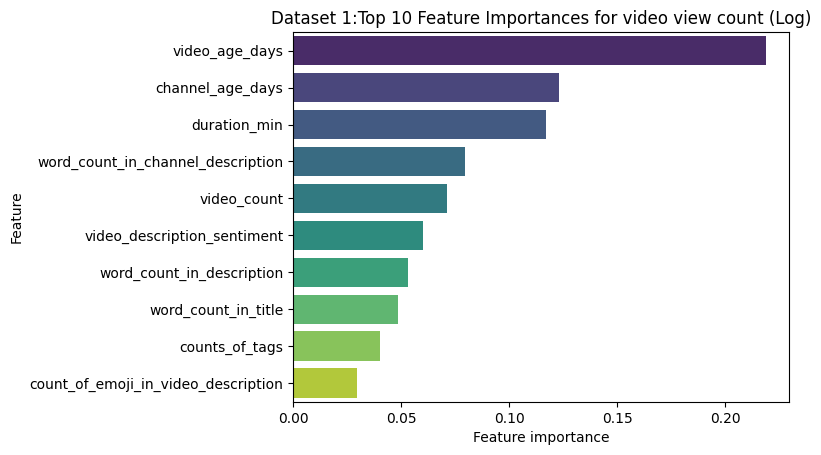

In [148]:
# Get the feature importance from the random forest model
feature_importance = random_forest_model_view.feature_importances_
# store it in the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': feature_importance
})

# Sort the feature by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10), palette='viridis' )
plt.title('Dataset 1:Top 10 Feature Importances for video view count (Log)')
plt.show()  

 98%|===================| 1664/1700 [00:36<00:00]        

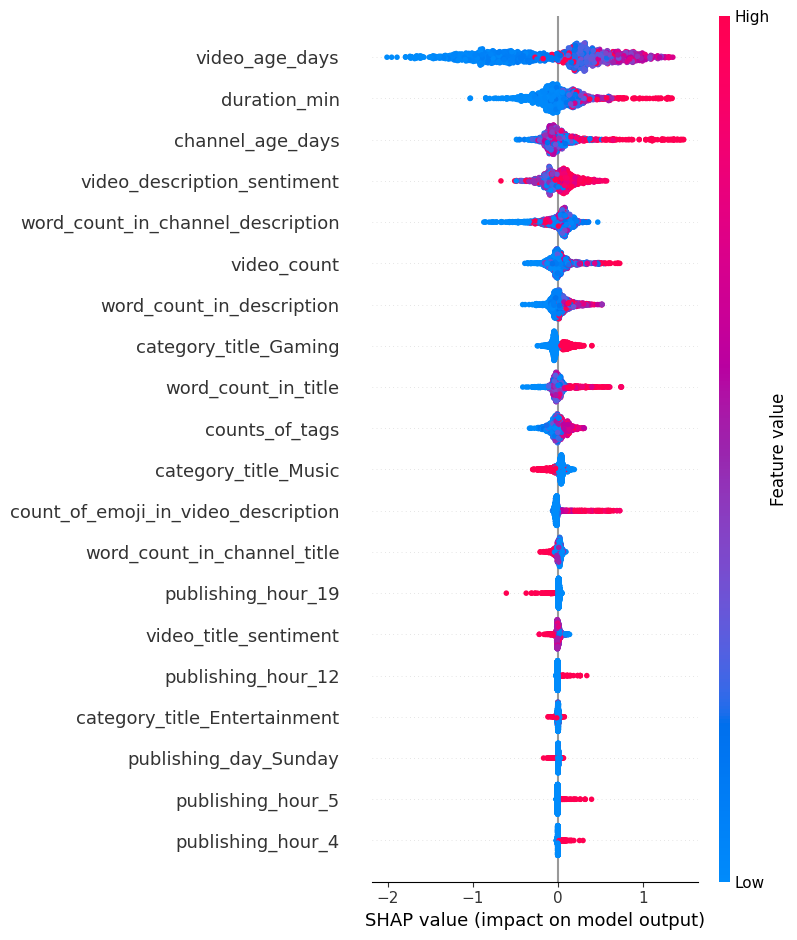

In [149]:
explainer = shap.Explainer(random_forest_model_view, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)      


In [ ]:
X = df_model
y = df_output['engaging_count'].apply(lambda x: np.log(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:

random_forest_model_engaging = RandomForestRegressor(random_state=9)
random_forest_model_engaging

In [ ]:
# train the model
train_model(model=random_forest_model_engaging, X_train=X_train, y_train=y_train)

In [ ]:
# Get the feature importance from the random forest model
feature_importance = random_forest_model_engaging.feature_importances_
# store it in the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': feature_importance
})

# Sort the feature by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10), palette='viridis' )
plt.title('Top 10 Feature Importances for video engaging count')
plt.show()  

In [ ]:
explainer = shap.Explainer(random_forest_model_engaging, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)      


In [ ]:
# Get the feature importance from the random forest model
feature_importance = random_forest_model_comment.feature_importances_
# store it in the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': feature_importance
})

# Sort the feature by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
feature_importance_df

In [ ]:
X = df_model
y = df_output['subscriber_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
random_forest_model_subscriber = RandomForestRegressor(random_state=9)
random_forest_model_subscriber

In [ ]:
# train the model
train_model(model=random_forest_model_subscriber, X_train=X_train, y_train=y_train)

In [ ]:
# Get the feature importance from the random forest model
feature_importance = random_forest_model_subscriber.feature_importances_
# store it in the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Feature importance': feature_importance
})

# Sort the feature by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10), palette='viridis' )
plt.title('Top 10 Feature Importances for subscriber count')
plt.show()  


In [ ]:

explainer = shap.Explainer(random_forest_model_subscriber, X_train)
shap_values = explainer(X_train, check_additivity=False)
shap.summary_plot(shap_values, X_train)      


In [ ]:
X_train.info()

In [ ]:
explainer = shap.TreeExplainer(random_forest_model_view)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
df.columns

In [ ]:
df_catboost_model = df[[
    'rank',
        'video_title',
       'video_description', 
       'tags', 
       'licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
  'channel_view_count',
       'subscriber_count', 'video_count', 'duration_min',
        'video_title_sentiment', 
       'video_description_sentiment', 
       'video_age_days', 'channel_age_days', 'counts_of_tags',
       
       'word_count_in_title', 'word_count_in_description',
       'word_count_in_channel_title', 'word_count_in_channel_description',
       'publishing_day_Friday', 'publishing_day_Monday',
       'publishing_day_Saturday', 'publishing_day_Sunday',
       'publishing_day_Thursday', 'publishing_day_Tuesday',
       'publishing_day_Wednesday', 'publishing_hour_0', 'publishing_hour_1',
       'publishing_hour_2', 'publishing_hour_3', 'publishing_hour_4',
       'publishing_hour_5', 'publishing_hour_7', 'publishing_hour_8',
       'publishing_hour_9', 'publishing_hour_10', 'publishing_hour_11',
       'publishing_hour_12', 'publishing_hour_13', 'publishing_hour_14',
       'publishing_hour_15', 'publishing_hour_16', 'publishing_hour_17',
       'publishing_hour_18', 'publishing_hour_19', 'publishing_hour_20',
       'publishing_hour_21', 'publishing_hour_22', 'publishing_hour_23']]

In [ ]:
df_output = df[output_cols]
df_output['engaging_count']= df['video_like_count'] + df['video_comment_count']
df_output.info()

In [ ]:
df_catboost_model = df_catboost_model.drop(columns=output_cols)


In [ ]:
X = df_model
y = df_output['video_view_count'].apply(lambda x: np.log(x))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
X_train.columns

Index(['licensed_content', 'video_count', 'duration_min', 'is_high_definition',
       'counts_of_tags', 'video_title_sentiment',
       'count_of_emoji_in_video_title', 'video_description_sentiment',
       'count_of_emoji_in_video_description', 'video_age_days',
       'channel_age_days', 'word_count_in_title', 'word_count_in_description',
       'word_count_in_channel_title', 'word_count_in_channel_description',
       'category_title_Comedy', 'category_title_Education',
       'category_title_Entertainment', 'category_title_Film & Animation',
       'category_title_Gaming', 'category_title_Music',
       'category_title_Nonprofits & Activism', 'category_title_People & Blogs',
       'category_title_Science & Technology', 'category_title_Sports',
       'publishing_day_Friday', 'publishing_day_Monday',
       'publishing_day_Saturday', 'publishing_day_Sunday',
       'publishing_day_Thursday', 'publishing_day_Tuesday',
       'publishing_day_Wednesday', 'publishing_hour_0', 'publish

In [ ]:
catboost_categorical_cols = [
 'video_title',
 'video_description',
 'tags',
 'channel_title',
 'channel_description',]

In [ ]:
for col in catboost_categorical_cols:
    X_train[col] = X_train[col].fillna('unknown').astype(str)
    X_test[col] = X_test[col].fillna('unknown').astype(str)

R^2: 0.7654511062773356
MAE: 0.42839491580815187
MSE: 0.5266190921930849
RMSE: 0.7256852569765249


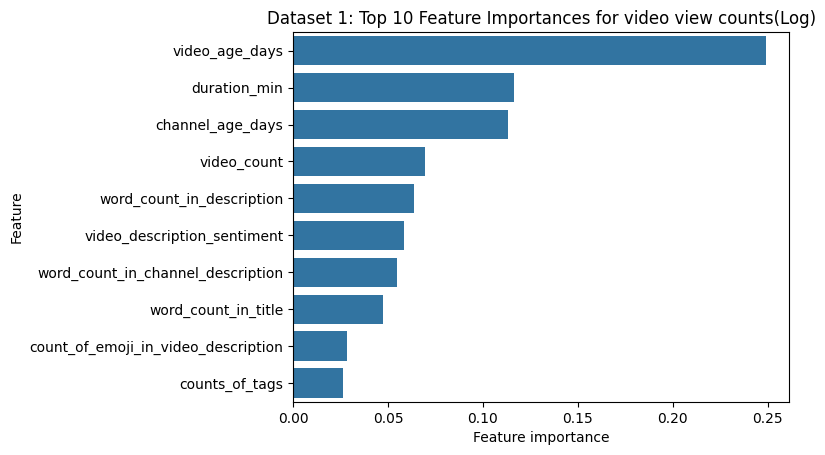

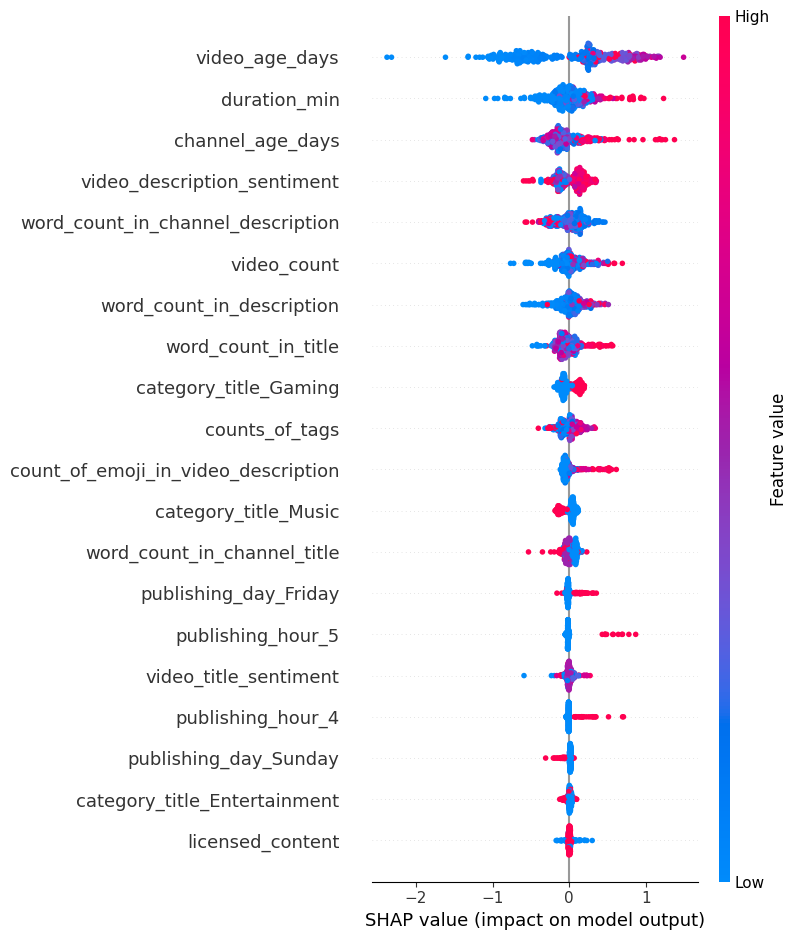

In [ ]:
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)
cat_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=6,
                             eval_metric='MAE',
                             random_seed=9,
                             logging_level='Silent',)
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)
y_pred = cat_model.predict(test_pool)   
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')  


feature_importances = cat_model.get_feature_importance(prettified=True)
feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
sns.barplot(x='Feature importance', y='Feature', data=feature_importance_df.head(10) )
plt.title('Dataset 1: Top 10 Feature Importances for video view counts(Log)')
plt.show()

shap_values = cat_model.get_feature_importance(type='ShapValues', data=test_pool)
shap.summary_plot(shap_values[:, :-1], X_test)   
